<a href="https://colab.research.google.com/github/raj-0105/Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetectionUsingMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('gdrive/MyDrive/Colab Notebooks/creditcard.csv')


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data = data.drop(['Time'],axis=1)

In [ ]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
data.shape

(284807, 30)

In [ ]:
data.duplicated().any()

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(275663, 30)

In [ ]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='count'>

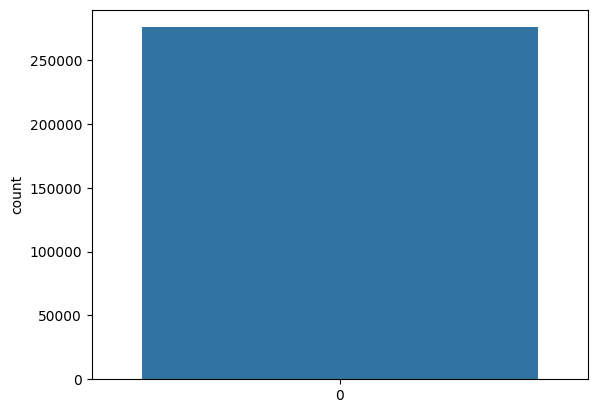

In [ ]:
sns.countplot(data['Class'])

In [ ]:
X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [ ]:
normal.shape

(275190, 30)

In [ ]:
fraud.shape

(473, 30)

In [ ]:
normal_sample=normal.sample(n=473)

In [ ]:
normal_sample.shape

(473, 30)

In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [ ]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.261434,-1.682899,0.910603,-1.292040,-2.030887,0.112642,-1.596262,0.182832,-1.276961,1.462891,...,0.022762,0.315845,-0.158583,-0.048034,0.305431,-0.046694,0.047882,0.031885,0.082562,0
1,-0.679699,-0.085687,1.003584,-0.333991,1.052155,-1.126226,0.094804,0.088980,-0.377428,-0.277577,...,0.022199,-0.253137,0.329430,-0.034984,-1.257433,-0.247831,0.154025,0.236757,-0.348072,0
2,1.013914,-0.895988,0.531635,0.430276,-0.917767,0.389592,-0.595020,0.063327,-0.811745,0.770147,...,-0.135414,-0.073476,-0.292023,-0.332249,0.563252,-0.216540,0.051108,0.045086,0.278468,0
3,1.216570,0.288014,0.520445,1.111957,-0.453190,-0.898168,0.073546,-0.135553,0.144015,-0.004117,...,-0.234378,-0.728761,0.104834,0.324655,0.345105,-0.629100,0.018968,0.029480,-0.313289,0
4,1.945100,0.464009,-2.296450,1.384582,1.081907,-0.637361,0.641580,-0.232088,-0.239765,-0.221617,...,0.035312,0.258559,-0.024747,0.600258,0.460521,-0.546479,-0.004511,-0.026952,-0.240084,0


In [ ]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.9368421052631579

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.96875

In [ ]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [ ]:
f1_score(y_test,y_pred1)

0.9393939393939394

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9

In [ ]:
precision_score(y_test,y_pred2)

0.9029126213592233

In [ ]:
recall_score(y_test,y_pred2)

0.9117647058823529

In [ ]:
f1_score(y_test,y_pred2)

0.9073170731707318

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9368421052631579

In [ ]:
precision_score(y_test,y_pred3)

0.9787234042553191

In [ ]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [ ]:
f1_score(y_test,y_pred3)

0.9387755102040817

In [ ]:
final_data = pd.DataFrame({'Models':['LogisticRegression','DecisionTree','RandomForest'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

,Models,ACC
0,LogisticRegression,93.684211
1,DecisionTree,90.000000
2,RandomForest,93.684211


In [ ]:
X = data.drop('Class',axis=1)
y = data['Class']

In [ ]:
X.shape

(275663, 29)

In [ ]:
y.shape

(275663,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:

accuracy_score(y_test,y_pred1)

0.944701842363458

In [ ]:
precision_score(y_test,y_pred1)

0.972965655940594

In [ ]:
recall_score(y_test,y_pred1)

0.9147501045397524

In [ ]:
f1_score(y_test,y_pred1)

0.9429602211497915

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9980740579236164

In [ ]:
precision_score(y_test,y_pred2)

0.9973133407155953

In [ ]:
recall_score(y_test,y_pred2)

0.9988364271039761

In [ ]:
f1_score(y_test,y_pred2)

0.9980743028431283

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9999273229405138

In [ ]:
precision_score(y_test,y_pred3)

0.9998545745396376

In [ ]:
recall_score(y_test,y_pred3)

1.0

In [ ]:
f1_score(y_test,y_pred3)

0.9999272819822931

In [ ]:
final_data = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [ ]:
final_data

,Models,ACC
0,Logistic Regression,94.470184
1,Decision Tree,99.807406
2,Random Forest,99.992732


In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [ ]:
model = joblib.load("gdrive/MyDrive/Colab Notebooks/credit_card_model")

In [ ]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
